In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
!pip install wordcloud

In [3]:
credits_df=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_df=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
credits_df.columns = ['id','tittle','cast','crew']
movies_df= movies_df.merge(credits_df,on='id')

In [6]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# <p style="background-color:#E74C3C;font-family:newtimeroman;color:#FDFEFE;font-size:150%;text-align:center;border-radius:10px 10px;"><b>Demographic Filtering</p>

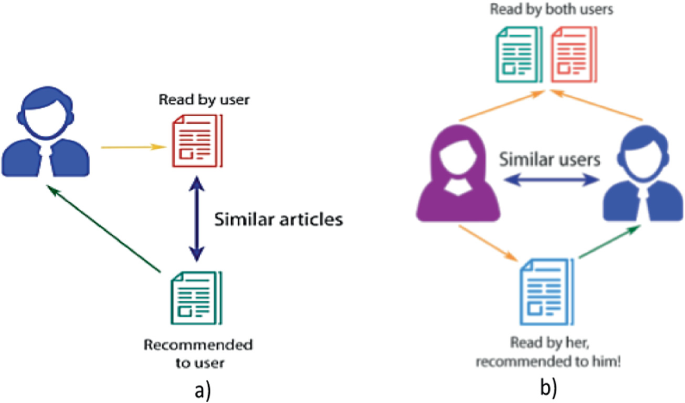

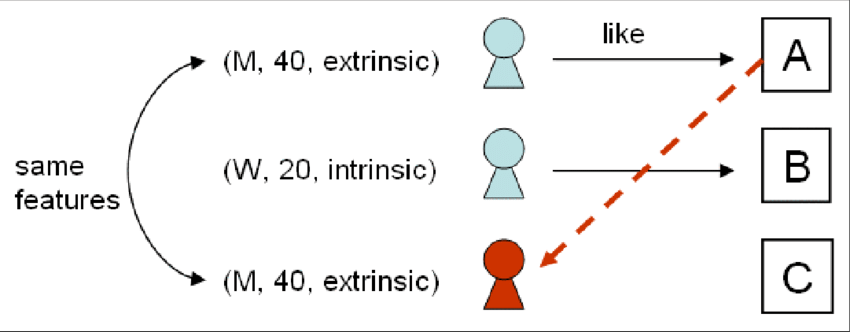

<p style="background-color:#F2D7D5;text-align:Center;padding: 20px;border-radius:10px 10px;">We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) :-<br></p>
<p style="background-color:#FDEDEC;text-align:left;padding: 20px;border-radius:10px 10px;"> wr=((votes for the movie/(votes for the movie+minimum votes required))*average rating)+
    ((minimum votes required/(votes for the movie+minimum votes required))* mean vote )</p>

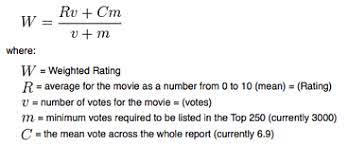

In [7]:
C= movies_df['vote_average'].mean()
C

6.092171559442016

In [8]:
m= movies_df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [9]:
# movies that qualify
q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
q_movies.shape

(481, 23)

In [10]:
# Calculation based on the IMDB formula
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [12]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 25 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(25)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [13]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

# <p style="background-color:#E74C3C;font-family:newtimeroman;color:#FDFEFE;font-size:150%;text-align:center;border-radius:10px 10px;"><b>Trending Value by Popular Movie</p>

Text(0.5, 1.0, 'Popular Movies')

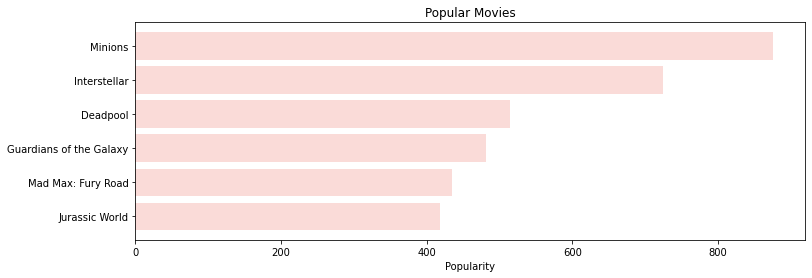

In [14]:
#Trending Value which are popular movies.
pop= movies_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',color='#FADBD8')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


In [15]:
movies_df['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

# <p style="background-color:#E74C3C;font-family:newtimeroman;color:#FDFEFE;font-size:150%;text-align:center;border-radius:10px 10px;"><b>Create Word Cloud</p>

In [16]:
# Word cloud on titles and keywords
title = []
for t in movies_df.title:
    title.append(t)
keywords = []
for k in movies_df.keywords:
    keywords.append(k)


In [17]:
from wordcloud import WordCloud
word_cloud_title=WordCloud(width=1500,height=800,background_color='#F2D7D5',min_font_size=2 ,
                        min_word_length=3).generate(str(title))
word_cloud_keyword=WordCloud(width=1500,height=800,background_color='#FADBD8',min_font_size=2 ,
                        min_word_length=3).generate(str(keywords))

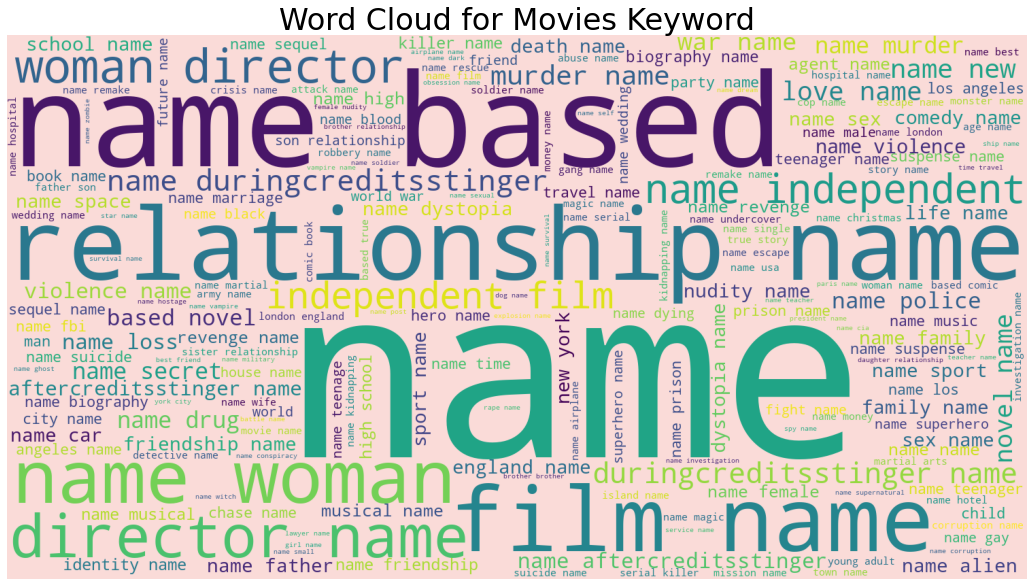

In [18]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Keyword',fontsize=30)
plt.imshow(word_cloud_keyword);

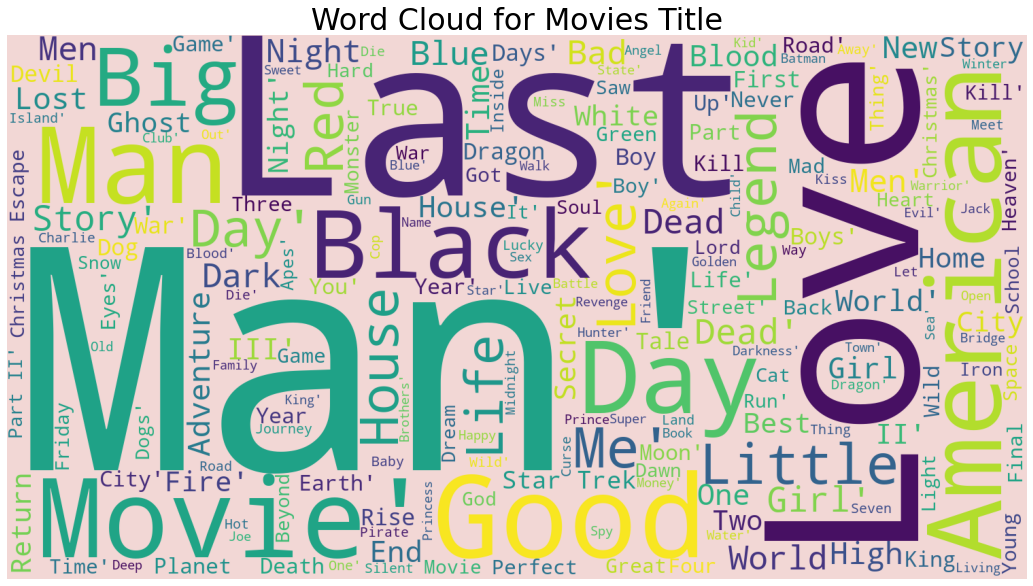

In [19]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

# <p style="background-color:#E74C3C;font-family:newtimeroman;color:#FDFEFE;font-size:150%;text-align:center;border-radius:10px 10px;"><b>Content Based Filtering</p>

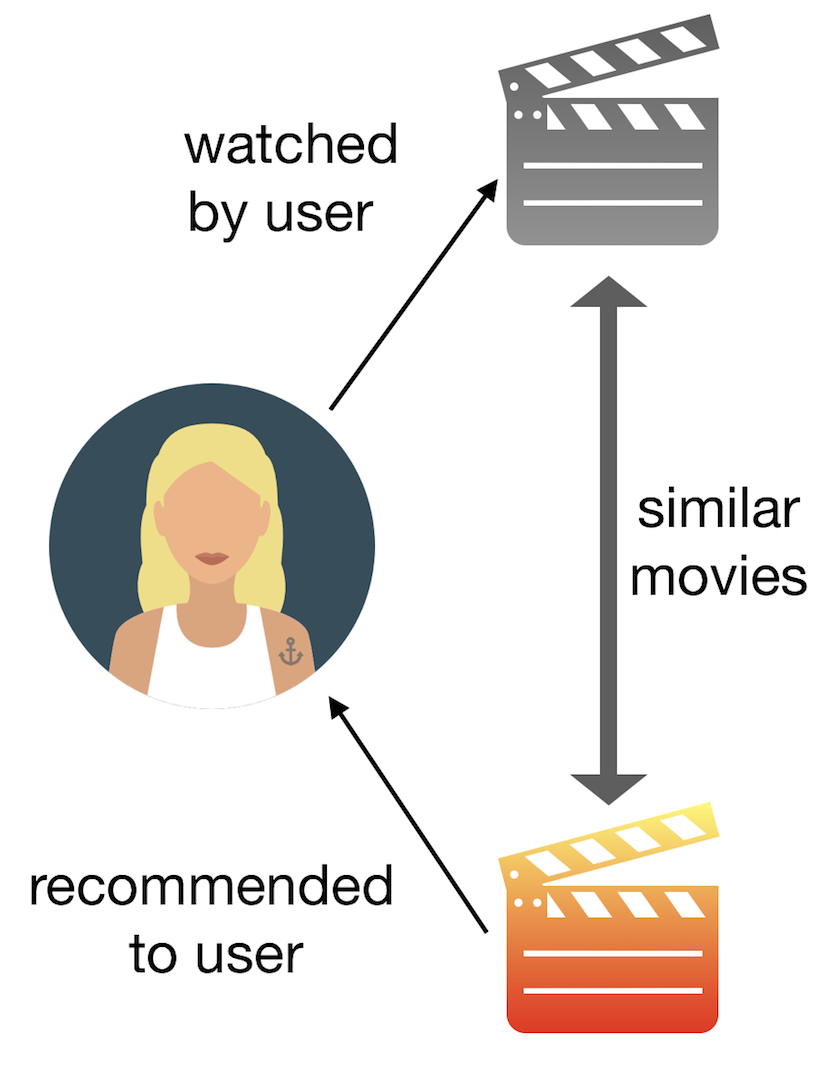

<p style="background-color:#F2D7D5;text-align:Center;padding: 20px;border-radius:10px 10px;">Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions-<br></p>


<p style="background-color:#FDEDEC;text-align:Center;padding: 20px;font-family:newtimeroman;font-size:150%;border-radius:10px 10px;"><b>Overview base Recommandation</p>

In [20]:
movies_df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [21]:
#convert the word vector of each overview

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies_df['overview'] = movies_df['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])
tfidf_matrix.shape

(4803, 20978)

In [22]:
# Compute the cosine similarity matrix

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

In [24]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return movies_df['title'].iloc[movie_indices]

In [25]:
get_recommendations('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object

In [26]:
get_recommendations('Iron Man')

79                     Iron Man 2
31                     Iron Man 3
1868           Cradle 2 the Grave
7         Avengers: Age of Ultron
538                       Hostage
119                 Batman Begins
1290     Baahubali: The Beginning
4574                     Roadside
2044           The Little Vampire
2633    The Clan of the Cave Bear
Name: title, dtype: object

<p style="background-color:#FDEDEC;text-align:Center;padding: 20px;font-family:newtimeroman;font-size:150%;border-radius:10px 10px;"><b>Credits, Genres and Keywords Based Recommender</p>

In [27]:
# features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

In [28]:
# Get the director's name from the crew feature. 
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [29]:
# Returns the list top 3 elements ; 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [30]:
# Define new director, cast, genres and keywords features.
movies_df['director'] = movies_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [31]:
# Print the new features of the first 3 films
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [32]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [33]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [34]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies_df['soup'] = movies_df.apply(create_soup, axis=1)

In [35]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['soup'])

In [36]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [37]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [38]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object